In [1]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter

In [2]:
fp = codecs.open('yang.txt', 'r')
lines = fp.readlines()  # 총 200줄의 내용
# print(len(lines))  # 한줄 한줄이 요구사항이고 그에 따른 y도 200개
# print(lines)
twitter = Twitter() # Twitter는 Okt로 바뀜
word_dic = {}
fp.close()

for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] in ['Noun', 'Adjective', 'Verb', 'Adverb']:
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1

C:\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
import operator

keys = sorted(word_dic.items(), key=operator.itemgetter(1), reverse=True)
# keys 글자와 빈도수를 묶는 튜플을 갖는 리스트
for word, count in keys[:10000]:
    print('{0} ({1}) '.format(word, count), end='')
print()

배송 (99) 배달 (36) 주문 (33) 변경 (31) 되나요 (22) 가방 (21) 오늘 (20) 주 (17) 해서 (16) 했는데 (15) 요 (15) 신청 (15) 취소 (15) 우유 (14) 하루 (14) 해주세요 (13) 제 (13) 개 (13) 도시락 (13) 두유 (12) 언제 (12) 문의 (12) 좀 (11) 수 (11) 다이어트 (11) 혹시 (10) 상품 (10) 부탁드립니다 (9) 어떻게 (9) 건가 (9) 분유 (9) 싶습니다 (9) 가요 (9) 식품 (9) 시작 (9) 시 (9) 제품 (9) 받아 (9) 확인 (8) 주소 (8) 먹어도 (8) 메뉴 (8) 내일 (7) 시간 (7) 알 (7) 있나요 (7) 월 (7) 때 (7) 번 (7) 합니다 (7) 배송지 (7) 개월 (7) 가능한가요 (7) 날짜 (7) 안 (7) 하는데 (6) 아기 (6) 세트 (6) 구입 (6) 회사 (6) 추가 (6) 프로그램 (6) 구매 (6) 된 (6) 같이 (6) 날 (6) 너무 (6) 드립니다 (6) 잘 (6) 그럼 (6) 다 (6) 하면 (6) 왜 (5) 꼭 (5) 거 (5) 택배 (5) 것 (5) 미 (5) 가능할까 (5) 앞 (5) 를 (5) 정기 (5) 할 (5) 결제 (5) 커피 (5) 현관 (5) 더 (5) 했습니다 (5) 그냥 (5) 되는건 (5) 이번 (5) 한번 (5) 처음 (5) 월요일 (5) 일 (5) 건지 (4) 오는 (4) 없이 (4) 왔는데 (4) 집 (4) 총 (4) 같은 (4) 안녕하세요 (4) 하려면 (4) 쇼핑몰 (4) 하나요 (4) 체험 (4) 요청 (4) 뒤 (4) 때문 (4) 보 (4) 다음 (4) 부터 (4) 초기 (4) 해 (4) 도착 (4) 종료 (4) 식단 (4) 는걸 (4) 지방 (4) 있을까요 (4) 두부 (4) 출근 (3) 이후 (3) 사람 (3) 이전 (3) 이벤트 (3) 어디 (3) 지역 (3) 안되나요 (3) 부탁드려요 (3) 왔습니다 (3) 기존 (3) 왔어요 (3) 어제 (3) 무료 (3) 샘플

In [4]:
from keras.preprocessing.text import *
from keras.preprocessing.sequence import skipgrams
import numpy as np

wordId_dic = {}
idx = 0
for key in keys:
    idx += 1
    print(idx , key)
    wordId_dic[key[0]] = idx  # wordId_dic 글자들과 순서를 갖는 dict

Using TensorFlow backend.


1 ('배송', 99)
2 ('배달', 36)
3 ('주문', 33)
4 ('변경', 31)
5 ('되나요', 22)
6 ('가방', 21)
7 ('오늘', 20)
8 ('주', 17)
9 ('해서', 16)
10 ('했는데', 15)
11 ('요', 15)
12 ('신청', 15)
13 ('취소', 15)
14 ('우유', 14)
15 ('하루', 14)
16 ('해주세요', 13)
17 ('제', 13)
18 ('개', 13)
19 ('도시락', 13)
20 ('두유', 12)
21 ('언제', 12)
22 ('문의', 12)
23 ('좀', 11)
24 ('수', 11)
25 ('다이어트', 11)
26 ('혹시', 10)
27 ('상품', 10)
28 ('부탁드립니다', 9)
29 ('어떻게', 9)
30 ('건가', 9)
31 ('분유', 9)
32 ('싶습니다', 9)
33 ('가요', 9)
34 ('식품', 9)
35 ('시작', 9)
36 ('시', 9)
37 ('제품', 9)
38 ('받아', 9)
39 ('확인', 8)
40 ('주소', 8)
41 ('먹어도', 8)
42 ('메뉴', 8)
43 ('내일', 7)
44 ('시간', 7)
45 ('알', 7)
46 ('있나요', 7)
47 ('월', 7)
48 ('때', 7)
49 ('번', 7)
50 ('합니다', 7)
51 ('배송지', 7)
52 ('개월', 7)
53 ('가능한가요', 7)
54 ('날짜', 7)
55 ('안', 7)
56 ('하는데', 6)
57 ('아기', 6)
58 ('세트', 6)
59 ('구입', 6)
60 ('회사', 6)
61 ('추가', 6)
62 ('프로그램', 6)
63 ('구매', 6)
64 ('된', 6)
65 ('같이', 6)
66 ('날', 6)
67 ('너무', 6)
68 ('드립니다', 6)
69 ('잘', 6)
70 ('그럼', 6)
71 ('다', 6)
72 ('하면', 6)
73 ('왜', 5)
74 ('꼭', 5)
75 ('거', 5)


In [5]:
all_sen = []

#모든 문장을 index로 바꾼다. 
for line in lines:
    sen_idx = [wordId_dic[text] for text in line if text in word_dic]
    all_sen.append(sen_idx)
all_sen_arr = np.array(all_sen)

X_train_all = all_sen_arr
X_train_all

array([list([73, 788, 164, 962, 344, 395, 876, 11]),
       list([962, 17, 115, 361, 36, 36, 962, 314, 788, 962, 75, 906, 788, 164, 962, 277, 388, 876, 11, 521, 95, 36, 256, 962, 194, 74, 788, 164, 115, 8, 11]),
       list([788, 962, 55, 379, 71, 17, 36, 23, 69, 8, 11, 36, 379, 71]),
       list([115, 87, 379, 17, 393, 962, 738, 361, 11, 962, 75, 788, 388, 77, 361, 8, 145, 962, 361, 194, 17, 8, 81, 363, 363, 962, 580, 11, 808, 49, 153, 393, 8, 81, 45, 24, 11, 8, 331, 45, 111, 521, 8, 36, 395, 393, 115, 580, 11]),
       list([208, 95, 594, 962, 361, 331, 395, 393, 11]),
       list([47, 788, 11]),
       list([788, 217, 962, 379, 361, 788, 388, 111, 521, 8, 36, 906, 55, 11]),
       list([388, 788, 164, 962, 11]),
       list([213, 100, 788, 393, 217, 962, 379, 361, 788, 788, 55, 11]),
       list([962, 36, 256, 396, 788, 788, 393, 396, 11]),
       list([788, 145, 115, 8, 11]),
       list([11, 75, 188, 377, 568, 636, 379, 71]),
       list([115, 95, 759, 78, 788, 379, 71]),
       l

In [14]:
fp2 = codecs.open('yang_class.txt', 'r')
classes = fp2.readlines()
cls26 = []      # y의 글자들의 리스트 (중복있음)
class_dic = {}    # y글자와 인덱스를 갖는 dict (중복없음)
idx = 0
print(classes)
for cls in classes:
    cls = cls.replace('\n', '')
    cls26.append(cls)
    
    if not (cls in class_dic):
        class_dic[cls] = idx
        idx += 1
        
fp2.close()

['미배송\n', '배송일정\n', '미배송\n', '배송장소\n', '미배송\n', '배송일정\n', '배송방법\n', '주문\n', '배송방법\n', '배송방법\n', '배송중단\n', '구매문의\n', '미배송\n', '배송연기\n', '배송오류\n', '배송일정\n', '가방\n', '배송장소\n', '미배송\n', '미배송\n', '배송변경\n', '가방\n', '배송일정\n', '결제오류\n', '결제오류\n', '상품문의\n', '인사\n', '배송일정\n', '배송신청\n', '배송일정\n', '배송장소\n', '상품변경\n', '배송장소\n', '상품문의\n', '상품문의\n', '상품변경\n', '배송문의\n', '미배송\n', '미배송\n', '교환환불\n', '이벤트\n', '시스템\n', '상품문의\n', '상품문의\n', '상품문의\n', '가방\n', '이벤트\n', '가방\n', '배송일정\n', '배송일정\n', '배송상품\n', '배송일정\n', '상품불량\n', '배송문의\n', '배송일정\n', '배송오류\n', '배송일정\n', '배송일정\n', '가방\n', '교환환불\n', '주문변경\n', '상품문의\n', '배송장소\n', '배송일정\n', '배송장소\n', '배송방법\n', '취소해지\n', '취소해지\n', '배송장소\n', '배송장소\n', '교환환불\n', '상품문의\n', '배송일정\n', '배송일정\n', '상품문의\n', '상품불량\n', '상품문의\n', '배송오류\n', '배송오류\n', '배송일정\n', '주문변경\n', '가방\n', '주문\n', '가방\n', '미배송\n', '미배송\n', '상품문의\n', '배송일정\n', '가방\n', '이벤트\n', '배송오류\n', '이벤트\n', '배송일정\n', '취소해지\n', '배송일정\n', '가방\n', '가방\n', '배송상품\n', '상품불량\n', '배송일정\n', '배송상품\n', '배송일정\n', '담당자\n', '가방\n', '배송

In [7]:
cls_idxes = []
index = 0

for text in cls26:
    idx = class_dic[text]
    index += 1
    print(index , text , idx)
    cls_idxes.append(idx)  # cls_idxes : 텍스트에 따른 인덱스들
    
cls_idxes_arr = np.array(cls_idxes)
Y_train_all = cls_idxes_arr
# Y_train_all

['미배송', '배송일정', '미배송', '배송장소', '미배송', '배송일정', '배송방법', '주문', '배송방법', '배송방법', '배송중단', '구매문의', '미배송', '배송연기', '배송오류', '배송일정', '가방', '배송장소', '미배송', '미배송', '배송변경', '가방', '배송일정', '결제오류', '결제오류', '상품문의', '인사', '배송일정', '배송신청', '배송일정', '배송장소', '상품변경', '배송장소', '상품문의', '상품문의', '상품변경', '배송문의', '미배송', '미배송', '교환환불', '이벤트', '시스템', '상품문의', '상품문의', '상품문의', '가방', '이벤트', '가방', '배송일정', '배송일정', '배송상품', '배송일정', '상품불량', '배송문의', '배송일정', '배송오류', '배송일정', '배송일정', '가방', '교환환불', '주문변경', '상품문의', '배송장소', '배송일정', '배송장소', '배송방법', '취소해지', '취소해지', '배송장소', '배송장소', '교환환불', '상품문의', '배송일정', '배송일정', '상품문의', '상품불량', '상품문의', '배송오류', '배송오류', '배송일정', '주문변경', '가방', '주문', '가방', '미배송', '미배송', '상품문의', '배송일정', '가방', '이벤트', '배송오류', '이벤트', '배송일정', '취소해지', '배송일정', '가방', '가방', '배송상품', '상품불량', '배송일정', '배송상품', '배송일정', '담당자', '가방', '배송일정', '가방', '배송일정', '배송오류', '미배송', '배송일정', '상품불량', '서비스', '배송일정', '취소해지', '배송장소', '상품문의', '취소해지', '배송장소', '가방', '상품문의', '상품문의', '상품문의', '취소해지', '취소해지', '이벤트', '담당자', '담당자', '상품문의', '이벤트', '배송일정', '배송일정', '배송일정

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding , Dropout, Activation
from keras.preprocessing import sequence
from keras.utils import np_utils

from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)
category = numpy.max(Y_train_all) + 1

X_train = X_train_all
X_test = X_train_all
Y_train = Y_train_all
Y_test = Y_train_all
print(Y_test.shape)
# 데이터 전처리 
x_train = sequence.pad_sequences(X_train, maxlen=100) # 200, 100
x_test = sequence.pad_sequences(X_test, maxlen=100)  # 200, 100
y_train = np_utils.to_categorical(Y_train)  # 200, 26 밑도 마찬가지
y_test = np_utils.to_categorical(Y_test)  # categorical data로 변환하는 기술


(200,)


In [9]:
model = Sequential()
model.add(Embedding(970, 100))
model.add(Dropout(0.62))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(y_train)
history = model.fit(x_train, y_train, batch_size=100, epochs=200, validation_data=(x_test, y_test))

(200, 100) (200, 100)
(200, 26) (200, 26)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 200 samples
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 3.2381 - accuracy: 0.0850 - val_loss: 3.2185 - val_accuracy: 0.2400
Epoch 2/200
200/200 [==============================] - 0s 828us/step - loss: 3.1873 - accuracy: 0.2400 - val_loss: 3.1756 - val_accuracy: 0.2400
Epoch 3/200
200/200 [==============================] - 0s 773us/step - loss: 3.1263 - accuracy: 0.2400 - val_loss: 3.1143 - val_accuracy: 0.2400
Epoch 4/200
200/200 [==============================] - 0s 741us/step - loss: 3.0472 - accuracy: 0.2400 - val_loss: 3.0286 - val_accuracy: 0.2400
Epoch 5/200
200/200 [==============================] - 0s 738us/step - loss: 2.9516 - accuracy: 0.2400 - val_loss: 2.9238 - val_accuracy: 0.2400
Epoch 6/200
200/200 [==============================] - 0s 768us/step - loss: 2.8689 - accuracy: 0.2400 - val_loss: 2.8366 - val_accuracy: 0.2400
Epoch 7/200
200/200 [==============================] - 0s 773us/step - loss: 2.8156 - 

Epoch 57/200
200/200 [==============================] - 0s 683us/step - loss: 1.9316 - accuracy: 0.4200 - val_loss: 1.9295 - val_accuracy: 0.4450
Epoch 58/200
200/200 [==============================] - 0s 688us/step - loss: 1.9341 - accuracy: 0.4250 - val_loss: 1.9081 - val_accuracy: 0.4450
Epoch 59/200
200/200 [==============================] - 0s 758us/step - loss: 1.8943 - accuracy: 0.4250 - val_loss: 1.8726 - val_accuracy: 0.4450
Epoch 60/200
200/200 [==============================] - 0s 718us/step - loss: 1.8811 - accuracy: 0.4400 - val_loss: 1.8425 - val_accuracy: 0.4550
Epoch 61/200
200/200 [==============================] - 0s 703us/step - loss: 1.8536 - accuracy: 0.4400 - val_loss: 1.8169 - val_accuracy: 0.4600
Epoch 62/200
200/200 [==============================] - 0s 693us/step - loss: 1.8351 - accuracy: 0.4350 - val_loss: 1.8237 - val_accuracy: 0.4650
Epoch 63/200
200/200 [==============================] - 0s 698us/step - loss: 1.8181 - accuracy: 0.4700 - val_loss: 1.7796 -

200/200 [==============================] - 0s 778us/step - loss: 0.8786 - accuracy: 0.8000 - val_loss: 0.7688 - val_accuracy: 0.8100
Epoch 114/200
200/200 [==============================] - 0s 698us/step - loss: 0.8475 - accuracy: 0.8000 - val_loss: 0.7699 - val_accuracy: 0.8050
Epoch 115/200
200/200 [==============================] - 0s 673us/step - loss: 0.8336 - accuracy: 0.8200 - val_loss: 0.7314 - val_accuracy: 0.8350
Epoch 116/200
200/200 [==============================] - 0s 681us/step - loss: 0.8248 - accuracy: 0.7900 - val_loss: 0.7109 - val_accuracy: 0.8450
Epoch 117/200
200/200 [==============================] - 0s 678us/step - loss: 0.8161 - accuracy: 0.8200 - val_loss: 0.7066 - val_accuracy: 0.8450
Epoch 118/200
200/200 [==============================] - 0s 678us/step - loss: 0.8123 - accuracy: 0.8100 - val_loss: 0.7009 - val_accuracy: 0.8450
Epoch 119/200
200/200 [==============================] - 0s 693us/step - loss: 0.7740 - accuracy: 0.8150 - val_loss: 0.6960 - val_ac

Epoch 169/200
200/200 [==============================] - 0s 719us/step - loss: 0.4059 - accuracy: 0.9150 - val_loss: 0.2980 - val_accuracy: 0.9400
Epoch 170/200
200/200 [==============================] - 0s 693us/step - loss: 0.3963 - accuracy: 0.9350 - val_loss: 0.2885 - val_accuracy: 0.9450
Epoch 171/200
200/200 [==============================] - 0s 683us/step - loss: 0.3739 - accuracy: 0.9350 - val_loss: 0.2841 - val_accuracy: 0.9400
Epoch 172/200
200/200 [==============================] - 0s 678us/step - loss: 0.4014 - accuracy: 0.8950 - val_loss: 0.2838 - val_accuracy: 0.9400
Epoch 173/200
200/200 [==============================] - 0s 688us/step - loss: 0.3826 - accuracy: 0.9250 - val_loss: 0.2787 - val_accuracy: 0.9400
Epoch 174/200
200/200 [==============================] - 0s 718us/step - loss: 0.3665 - accuracy: 0.9400 - val_loss: 0.2750 - val_accuracy: 0.9450
Epoch 175/200
200/200 [==============================] - 0s 778us/step - loss: 0.3673 - accuracy: 0.9250 - val_loss: 0

200/200 [==============================] - 0s 827us/step

 Test Accuracy: 0.9700
200


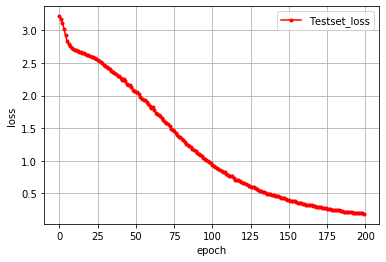

In [10]:
print('\n Test Accuracy: {0:0.4f}'.format(model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss'] # ephocs를 돌면서 나온 vloss의 기록을 의미
print(len(y_vloss)) # 200개, 
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Embedding(970, 100))
model.add(Dropout(0.62))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

x_tr, x_te, y_tr, y_te = train_test_split(
    x_train, y_train, test_size=0.33, random_state=0
)
print(len(y_tr))

134


In [12]:
history = model.fit(x_tr, y_tr, batch_size=100, epochs=200, validation_data=(x_test, y_test))
print('\n Test Accuracy: {0:0.4f}'.format(model.evaluate(x_te, y_te)[1]))

C:\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 134 samples, validate on 200 samples
Epoch 1/200
134/134 [==============================] - 1s 7ms/step - loss: 3.2460 - accuracy: 0.0299 - val_loss: 3.2239 - val_accuracy: 0.2400
Epoch 2/200
134/134 [==============================] - 0s 990us/step - loss: 3.1930 - accuracy: 0.2313 - val_loss: 3.1807 - val_accuracy: 0.2400
Epoch 3/200
134/134 [==============================] - 0s 968us/step - loss: 3.1317 - accuracy: 0.2463 - val_loss: 3.1206 - val_accuracy: 0.2400
Epoch 4/200
134/134 [==============================] - 0s 871us/step - loss: 3.0532 - accuracy: 0.2463 - val_loss: 3.0364 - val_accuracy: 0.2400
Epoch 5/200
134/134 [==============================] - 0s 815us/step - loss: 2.9568 - accuracy: 0.2463 - val_loss: 2.9382 - val_accuracy: 0.2400
Epoch 6/200
134/134 [==============================] - 0s 871us/step - loss: 2.8747 - accuracy: 0.2463 - val_loss: 2.8564 - val_accuracy: 0.2400
Epoch 7/200
134/134 [==============================] - 0s 930us/step - loss: 2.8093 - 

134/134 [==============================] - 0s 811us/step - loss: 2.0709 - accuracy: 0.3955 - val_loss: 2.2899 - val_accuracy: 0.3600
Epoch 58/200
134/134 [==============================] - 0s 826us/step - loss: 2.0644 - accuracy: 0.3955 - val_loss: 2.2826 - val_accuracy: 0.3650
Epoch 59/200
134/134 [==============================] - 0s 826us/step - loss: 2.0299 - accuracy: 0.4179 - val_loss: 2.2625 - val_accuracy: 0.3850
Epoch 60/200
134/134 [==============================] - 0s 819us/step - loss: 2.0147 - accuracy: 0.4179 - val_loss: 2.2422 - val_accuracy: 0.3900
Epoch 61/200
134/134 [==============================] - 0s 789us/step - loss: 1.9678 - accuracy: 0.4104 - val_loss: 2.2263 - val_accuracy: 0.3900
Epoch 62/200
134/134 [==============================] - 0s 841us/step - loss: 1.9718 - accuracy: 0.4030 - val_loss: 2.2144 - val_accuracy: 0.3950
Epoch 63/200
134/134 [==============================] - 0s 835us/step - loss: 1.9391 - accuracy: 0.4478 - val_loss: 2.2090 - val_accuracy

134/134 [==============================] - 0s 811us/step - loss: 1.0200 - accuracy: 0.7612 - val_loss: 1.6483 - val_accuracy: 0.6100
Epoch 114/200
134/134 [==============================] - 0s 848us/step - loss: 0.9987 - accuracy: 0.7761 - val_loss: 1.6289 - val_accuracy: 0.6300
Epoch 115/200
134/134 [==============================] - 0s 834us/step - loss: 1.0000 - accuracy: 0.7761 - val_loss: 1.6182 - val_accuracy: 0.6250
Epoch 116/200
134/134 [==============================] - 0s 819us/step - loss: 0.9969 - accuracy: 0.7239 - val_loss: 1.6180 - val_accuracy: 0.6250
Epoch 117/200
134/134 [==============================] - 0s 804us/step - loss: 0.9533 - accuracy: 0.7388 - val_loss: 1.6177 - val_accuracy: 0.6250
Epoch 118/200
134/134 [==============================] - 0s 1ms/step - loss: 0.9729 - accuracy: 0.7687 - val_loss: 1.6105 - val_accuracy: 0.6200
Epoch 119/200
134/134 [==============================] - 0s 1ms/step - loss: 0.9330 - accuracy: 0.7836 - val_loss: 1.5962 - val_accura

Epoch 169/200
134/134 [==============================] - 0s 811us/step - loss: 0.4366 - accuracy: 0.9403 - val_loss: 1.3463 - val_accuracy: 0.7100
Epoch 170/200
134/134 [==============================] - 0s 901us/step - loss: 0.4287 - accuracy: 0.9254 - val_loss: 1.3413 - val_accuracy: 0.7100
Epoch 171/200
134/134 [==============================] - 0s 906us/step - loss: 0.4396 - accuracy: 0.9179 - val_loss: 1.3422 - val_accuracy: 0.7200
Epoch 172/200
134/134 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.9179 - val_loss: 1.3447 - val_accuracy: 0.7200
Epoch 173/200
134/134 [==============================] - 0s 831us/step - loss: 0.4280 - accuracy: 0.9179 - val_loss: 1.3396 - val_accuracy: 0.7150
Epoch 174/200
134/134 [==============================] - 0s 807us/step - loss: 0.4233 - accuracy: 0.9254 - val_loss: 1.3277 - val_accuracy: 0.7150
Epoch 175/200
134/134 [==============================] - 0s 860us/step - loss: 0.4038 - accuracy: 0.9478 - val_loss: 1.3

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

fp = codecs.open('yang.txt', 'r')
lines = fp.readlines()  # 총 200줄의 내용
all_sen2 = []

for line in lines:
    line2 = line.split()
    sen_idx = [text for text in line2 if text in word_dic]
    all_sen2.append(' '.join(sen_idx))
# print(all_sen2)

X = pd.DataFrame(all_sen2, columns=['title'])

x_tr, x_te, y_tr, y_te = train_test_split(
    X['title'], Y_train_all, test_size=0.33, random_state=0
)

count_vector = CountVectorizer()
training_data = count_vector.fit_transform(x_tr)
testing_data = count_vector.transform(x_te)
print(type(training_data))
print(y_train)

gnb = MultinomialNB()
gnb.fit(training_data, y_tr)
prediction = gnb.predict(testing_data)
metrics.accuracy_score(prediction, y_te)

<class 'scipy.sparse.csr.csr_matrix'>
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


0.2727272727272727